In [ ]:
def error_evaluation_rms(errors):
    
    sum_of_squares = 0
    
    for error in errors:
        sum_of_squares = sum_of_squares + error**2
        
    return ((sum_of_squares/len(errors))**(1./2.)) #incorporated division by n, which is the proper rms 

def mcfunc(model_parameters):
    T_service = 22. + 273.
    prec_stress = 0
    SS_stress = 750
    
    strain_stress, WTN = irreverisble.mechanics(prec_stress,SS_stress,T_service,model_parameters,no_samples)
    strain_stress = np.array(np.trim_zeros(strain_stress)).reshape(-1,2)
    #print strain_stress
    
    #----------------------------
    cal_val = []
    errors = []
    
    #traverses experimental data points
    for iexp, data in enumerate(exp[:,0]):
        
        #finding nearest neighbors that surround the data points, and using them to determine the error
        for ical, data in enumerate(strain_stress[:,0]):
            
            ical = ical-1 # May or may not be advantageous to keep this instead of the range attribute for mem save
            
            left_strainpoint = strain_stress[ical,0]
            right_strainpoint = strain_stress[ical+1,0]
            
            exp_datapoint = exp[iexp,0]
            
            if(exp_datapoint>left_strainpoint and exp_datapoint<right_strainpoint):
                                
                # stores the differences between the successive approximations so we interpolate
                left_difference = exp_datapoint-left_strainpoint
                right_difference = right_strainpoint-exp_datapoint
                
                total_difference = left_difference+right_difference
                
                left_weight = left_difference/total_difference
                right_weight = right_difference/total_difference
                  
                # interpolate stress based on strain?
                interpolated_strain = left_weight*left_strainpoint + right_weight*right_strainpoint
                interpolated_stress = left_weight*strain_stress[ical,1] + right_weight*strain_stress[ical+1,1]
                    
                stress_error = interpolated_stress - exp[iexp,1]    
                #print stress_error
                
                #adds value, we want to find difference between these approximated data points and the real results
                cal_val.append([interpolated_strain,interpolated_stress])                 
                errors.append(stress_error)
                
                break
    
    #print errors
    error_rms = error_evaluation_rms(errors)    
    cal_val = np.asarray(cal_val)
    
    #print cal_val
    #----------------------------
    
    # return error as well as the results of stress-strain curve?
    return error_rms


%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plot

from scipy.optimize import minimize

import timeit
from memory_profiler import memory_usage

#all methods to minimize
methods = ['Nelder-Mead','Powell','CG','BFGS','L-BFGS-B','TNC','COBYLA','SLSQP']

start = np.zeros(0)
stop = np.zeros(0)
num_iters = np.zeros(0)

most_mem = np.zeros(0)

#runtime code goes here

function = mcfunc

#testing every minimization method
for method in methods:
    
    mem_use = memory_usage(-1,interval=0.1)
    start = np.append(start,timeit.default_timer())
    
    guess = [-5.,10.] # guess for correct minimum
    
    # Possibly was finding the iterations in the wrong order
    result = minimize(function, x0 = guess, method = method,tol=1e-6)
    
    keys = result.keys() # contains all traits of result
    iterations = -1
    
    if 'nit' in keys:    
        iterations = result.get('nit')
        
    num_iters = np.append(num_iters,iterations)
    stop = np.append(stop,timeit.default_timer())
    
    # tracks amount of memory used
    most_mem = np.append(most_mem,max(mem_use)) 

exec_time = stop-start

# If an algorithm took (-1) iterations, the number of iterations was not returned
for counter, method in enumerate(methods):
    
    print '{0} took {1} seconds. The result, {4} was found at ({2}, {3})'.format(method,exec_time[counter],result.x[0],result.x[1],result.fun)
    print '{0} used {1} megabytes and took {2} iterations'.format(method,most_mem[counter],num_iters[counter])
    print
    

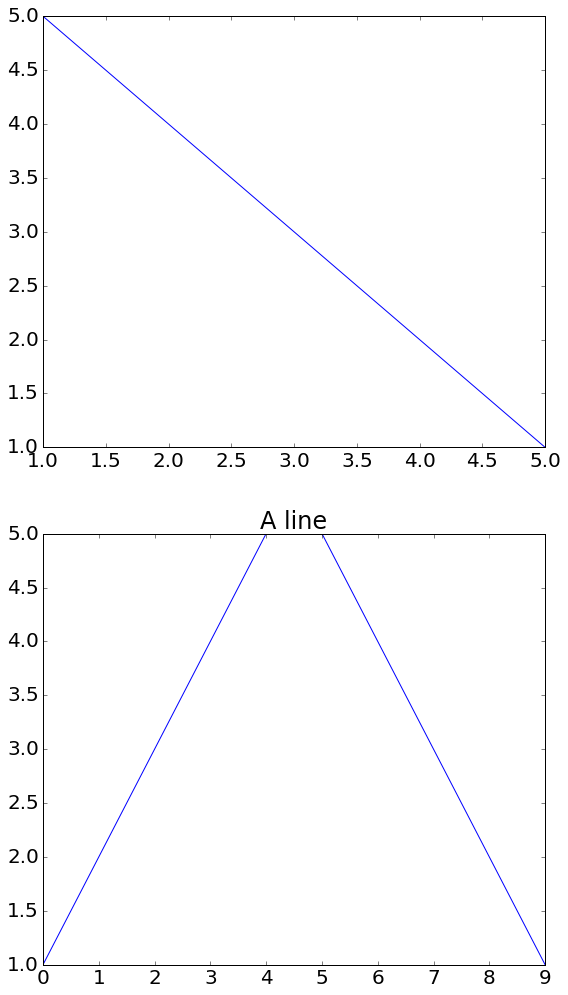

In [25]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plot
import numpy as np

data = [[1,2,3,4,5],[5,4,3,2,1]]

fig, axes = plot.subplots(2)

plot.title("A line")
matplotlib.rcParams.update({'font.size': 20})
fig.set_size_inches(9,17)

axes[0].plot(data[0],data[1])
axes[1].plot(np.array(data).reshape(-1,1))

    
    
    
    

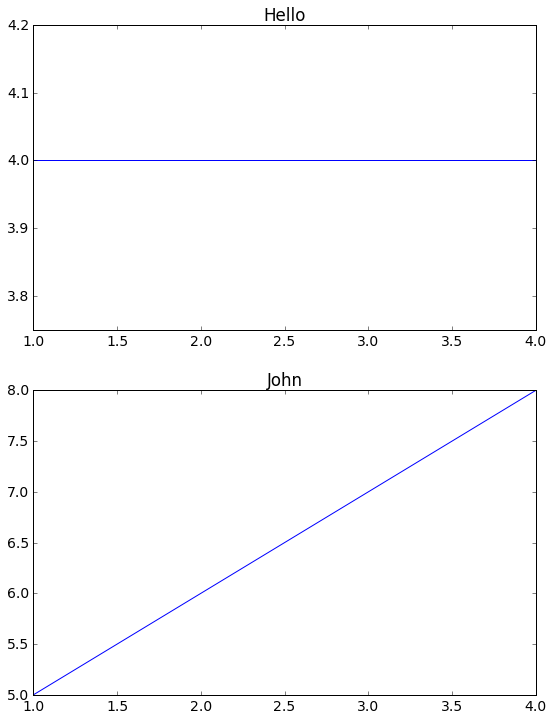

In [67]:
# plotting an arbitrary number of subplots
def plots2D(data, subplots = 1, titles=[""], xlabel="", ylabel="", fontsize = 14):
    
    import matplotlib
    import matplotlib.pyplot as plot
    import numpy as np
    
    figure, axes = plot.subplots(subplots, figsize = (9,6*subplots))
    matplotlib.rcParams.update({'font.size': fontsize})
    
    if subplots>1:
        
        for index, axis in enumerate(axes):
            
            axis.set_title(titles[index])
            axis.set_xlabel(xlabel)
            axis.set_ylabel(ylabel)
            
            
            # skips every other line which is the data
            index = index*2
            axis.plot(data[index],data[index+1])
            
    else:
        
        axes.set_title(titles)
        axes.set_xlabel(xlabel)
        axes.set_ylabel(ylabel)
        axes.plot(data[0],data[1])

plots2D(data = [[1,2,3,4],[4,4,4,4],[1,2,3,4],[5,6,7,8]],subplots=2, titles = ["First","Second"])
    
    

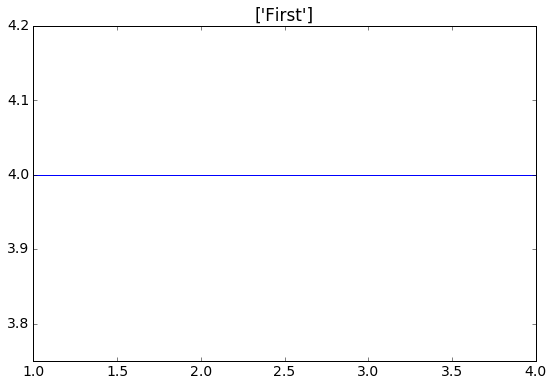

In [68]:
# plotting an arbitrary number of subplots
def plots3D(data, subplots = 1, titles=[""], xlabel="", ylabel="", zlabel="", fontsize = 14):
    
    import matplotlib
    import matplotlib.pyplot as plot
    import numpy as np
    
    figure, axes = plot.subplots(subplots, figsize = (9,6*subplots))
    matplotlib.rcParams.update({'font.size': fontsize})
    
    if subplots>1:
        
        for index, axis in enumerate(axes):
            
            axis.set_title(titles[index])
            axis.set_xlabel(xlabel)
            axis.set_ylabel(ylabel)
            
            
            # skips every two lines which is the data
            index = index*3
            axis.plot(data[index],data[index+1],data[index+2])
            
    else:
        
        axes.set_title(titles)
        axes.set_xlabel(xlabel)
        axes.set_ylabel(ylabel)
        axes.plot(data[0],data[1],data[2])

plots2D(data = [[1,2,3,4],[4,4,4,4],[1,2,3,4]],subplots=1, titles = ["First"])


"""%matplotlib notebook 

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 14

fig = plt.figure()
ax = fig.gca(projection='3d')

interval = 10.

x_domain = np.arange(-100.,0.,interval)
y_domain = np.arange(-10.,20.,interval)

x = np.zeros(0)
y = np.zeros(0)

for y_val in y_domain:
    
    x = np.append(x,x_domain)
    
    for x_val in x_domain:
       
        y = np.append(y,y_val)

z = np.zeros(0)
        
for index, value in enumerate(x):
    
    model_params = (x[index],y[index])
    z = np.append(z,mcfunc(model_params))
    
ax.plot(x,y,z,"p")

ax.set_xlabel("Parameter 1", fontsize = 16)
ax.set_ylabel("Parameter 2", fontsize = 16)
ax.set_zlabel("Error from experimental results", fontsize = 16)

plt.show()"""

<IPython.core.display.Javascript object>


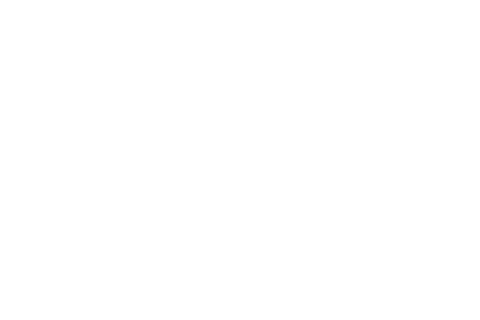

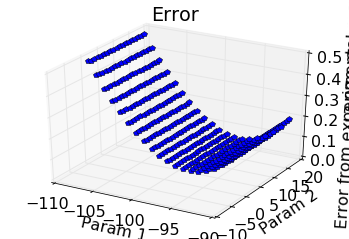

In [91]:
def IntervalPlot3D(xlabel="",ylabel="",zlabel="",title="",fontsize=14):
    
    %matplotlib notebook 

    import matplotlib as mpl
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    import matplotlib.pyplot as plt

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plt.title(title)
    matplotlib.rcParams.update({'font.size': fontsize})
    
    interval = 1.

    x_domain = np.arange(-110.,-90.,interval)
    y_domain = np.arange(-10.,20.,interval)

    x = np.zeros(0)
    y = np.zeros(0)

    for y_val in y_domain:

        x = np.append(x,x_domain)

        for x_val in x_domain:

            y = np.append(y,y_val)

    z = np.zeros(0)

    for index, value in enumerate(x):

        model_params = (x[index],y[index])
        z = np.append(z,mcfunc(model_params))

    ax.plot(x,y,z,"p")

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)

    plt.show()
    
IntervalPlot3D(xlabel="Param 1",ylabel="Param 2",zlabel="Error from experimental results",title="Error", fontsize=16)

In [77]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

from sklearn.metrics import r2_score

###############################################################################
# Lasso and Linear
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.metrics import mean_squared_error

import scipy.optimize as sciop

!make fortran
import irreverisble #importing the fortran mechanics routine

global exp
exp = []                           # ***** target 
exp = np.loadtxt('ref/HSRS/22')

def error_evaluation_rms(errors):
    
    sum_of_squares = 0
    
    for error in errors:
        sum_of_squares = sum_of_squares + error**2
        
    return ((sum_of_squares/len(errors))**(1./2.)) #incorporated division by n, which is the proper rms 

def mcfunc(model_parameters):
    T_service = 22. + 273.
    prec_stress = 0
    SS_stress = 750
    
    strain_stress, WTN = irreverisble.mechanics(prec_stress,SS_stress,T_service,model_parameters,no_samples)
    strain_stress = np.array(np.trim_zeros(strain_stress)).reshape(-1,2)
    #print strain_stress
    
    #----------------------------
    cal_val = []
    errors = []
    
    #traverses experimental data points
    for iexp, data in enumerate(exp[:,0]):
        
        #finding nearest neighbors that surround the data points, and using them to determine the error
        for ical, data in enumerate(strain_stress[:,0]):
            
            ical = ical-1 # May or may not be advantageous to keep this instead of the range attribute for mem save
            
            left_strainpoint = strain_stress[ical,0]
            right_strainpoint = strain_stress[ical+1,0]
            
            exp_datapoint = exp[iexp,0]
            
            if(exp_datapoint>left_strainpoint and exp_datapoint<right_strainpoint):
                                
                # stores the differences between the successive approximations so we interpolate
                left_difference = exp_datapoint-left_strainpoint
                right_difference = right_strainpoint-exp_datapoint
                
                total_difference = left_difference+right_difference
                
                left_weight = left_difference/total_difference
                right_weight = right_difference/total_difference
                  
                # interpolate stress based on strain?
                interpolated_strain = left_weight*left_strainpoint + right_weight*right_strainpoint
                interpolated_stress = left_weight*strain_stress[ical,1] + right_weight*strain_stress[ical+1,1]
                    
                stress_error = interpolated_stress - exp[iexp,1]    
                #print stress_error
                
                #adds value, we want to find difference between these approximated data points and the real results
                cal_val.append([interpolated_strain,interpolated_stress])                 
                errors.append(stress_error)
                
                break
    
    #print errors
    error_rms = error_evaluation_rms(errors)    
    cal_val = np.asarray(cal_val)
    
    #print cal_val
    #----------------------------
    
    # return error as well as the results of stress-strain curve?
    return error_rms

# --------------- material properties
T_service = 22. + 273.
prec_stress = 0
SS_stress = 750

# -------------- number samples, =1 in this case
no_samples = 1
# ============================== objective
# optimize these two parameters (model_parameters)
# to minimize the error between [exp] and [stress_strain]
# ==============================
model_parameters = (-100, 1)


# the function, irreverisble.mechanics, is used to calculate the stress-strain curve in plastic deforamtion region 
# the outputs are 2D list (stress-strain, stress_strain) and 1 parameter (work to necking, WTN)
strain_stress, WTN = irreverisble.mechanics(prec_stress,SS_stress,T_service,model_parameters,no_samples)
strain_stress = np.array(np.trim_zeros(strain_stress)).reshape(-1,2)

necking_loc = strain_stress[strain_stress==WTN]
#plotSingle2D(strain_stress,'strain','stress','linear','linear')

clear
f2py -c -m irreverisble irreverisble.f90
running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "irreverisble" sources
f2py options: []
f2py:> /tmp/tmpHC4nxI/src.linux-x86_64-2.7/irreverisblemodule.c
creating /tmp/tmpHC4nxI/src.linux-x86_64-2.7
Reading fortran codes...
	Reading file 'irreverisble.f90' (format:free)
Post-processing...
	Block: irreverisble
			Block: mechanics
In: :irreverisble:irreverisble.f90:mechanics
get_parameters: got "name 'acos' is not defined" on 'acos(-1.0e0)'
Post-processing (stage 2)...
Building modules...
	Building module "irreverisble"...
		Constructing wrapper function "mechanics"...
		  stress_strain,wtn = mechanics(p_stress,ss_stress,tsam,m_para,[samples])
	Wrote C/API module "irreverisble" to file "/tmp/tmpHC4nxI/src.linux-x86_64-2.7/irrever

<IPython.core.display.Javascript object>


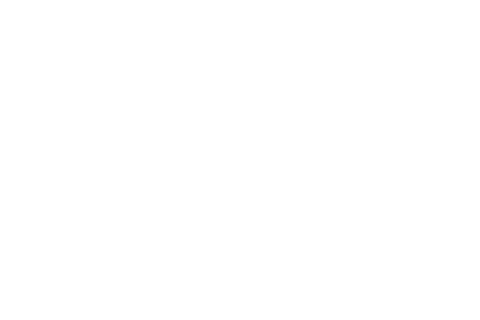

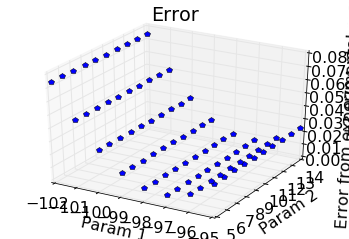

In [92]:
%matplotlib notebook 
def IntervalPlot3D(xlabel="",ylabel="",zlabel="",title="",fontsize=14):

    import matplotlib as mpl
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    import matplotlib.pyplot as plt

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plt.title(title)
    matplotlib.rcParams.update({'font.size': fontsize})
    
    interval = 1.

    x_domain = np.arange(-102.,-94.,interval)
    y_domain = np.arange(5.,15.,interval)

    x = np.zeros(0)
    y = np.zeros(0)

    for y_val in y_domain:

        x = np.append(x,x_domain)

        for x_val in x_domain:

            y = np.append(y,y_val)

    z = np.zeros(0)

    for index, value in enumerate(x):

        model_params = (x[index],y[index])
        z = np.append(z,mcfunc(model_params))

    ax.plot(x,y,z,"p")

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)

    plt.show()
    
IntervalPlot3D(xlabel="Param 1",ylabel="Param 2",zlabel="Error from experimental results",title="Error", fontsize=16)

clear
f2py -c -m irreverisble irreverisble.f90
running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "irreverisble" sources
f2py options: []
f2py:> /tmp/tmpvfSpmR/src.linux-x86_64-2.7/irreverisblemodule.c
creating /tmp/tmpvfSpmR/src.linux-x86_64-2.7
Reading fortran codes...
	Reading file 'irreverisble.f90' (format:free)
Post-processing...
	Block: irreverisble
			Block: mechanics
In: :irreverisble:irreverisble.f90:mechanics
get_parameters: got "name 'acos' is not defined" on 'acos(-1.0e0)'
Post-processing (stage 2)...
Building modules...
	Building module "irreverisble"...
		Constructing wrapper function "mechanics"...
		  stress_strain,wtn = mechanics(p_stress,ss_stress,tsam,m_para,[samples])
	Wrote C/API module "irreverisble" to file "/tmp/tmpvfSpmR/src.linux-x86_64-2.7/irrever

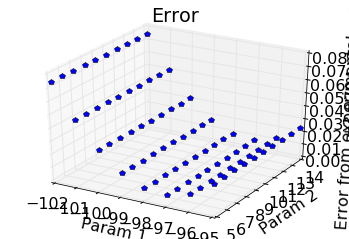

In [93]:
%matplotlib notebook 

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

from sklearn.metrics import r2_score

###############################################################################
# Lasso and Linear
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.metrics import mean_squared_error

import scipy.optimize as sciop

!make fortran
import irreverisble #importing the fortran mechanics routine

global exp
exp = []                           # ***** target 
exp = np.loadtxt('ref/HSRS/22')

def error_evaluation_rms(errors):
    
    sum_of_squares = 0
    
    for error in errors:
        sum_of_squares = sum_of_squares + error**2
        
    return ((sum_of_squares/len(errors))**(1./2.)) #incorporated division by n, which is the proper rms 

def mcfunc(model_parameters):
    T_service = 22. + 273.
    prec_stress = 0
    SS_stress = 750
    
    strain_stress, WTN = irreverisble.mechanics(prec_stress,SS_stress,T_service,model_parameters,no_samples)
    strain_stress = np.array(np.trim_zeros(strain_stress)).reshape(-1,2)
    #print strain_stress
    
    #----------------------------
    cal_val = []
    errors = []
    
    #traverses experimental data points
    for iexp, data in enumerate(exp[:,0]):
        
        #finding nearest neighbors that surround the data points, and using them to determine the error
        for ical, data in enumerate(strain_stress[:,0]):
            
            ical = ical-1 # May or may not be advantageous to keep this instead of the range attribute for mem save
            
            left_strainpoint = strain_stress[ical,0]
            right_strainpoint = strain_stress[ical+1,0]
            
            exp_datapoint = exp[iexp,0]
            
            if(exp_datapoint>left_strainpoint and exp_datapoint<right_strainpoint):
                                
                # stores the differences between the successive approximations so we interpolate
                left_difference = exp_datapoint-left_strainpoint
                right_difference = right_strainpoint-exp_datapoint
                
                total_difference = left_difference+right_difference
                
                left_weight = left_difference/total_difference
                right_weight = right_difference/total_difference
                  
                # interpolate stress based on strain?
                interpolated_strain = left_weight*left_strainpoint + right_weight*right_strainpoint
                interpolated_stress = left_weight*strain_stress[ical,1] + right_weight*strain_stress[ical+1,1]
                    
                stress_error = interpolated_stress - exp[iexp,1]    
                #print stress_error
                
                #adds value, we want to find difference between these approximated data points and the real results
                cal_val.append([interpolated_strain,interpolated_stress])                 
                errors.append(stress_error)
                
                break
    
    #print errors
    error_rms = error_evaluation_rms(errors)    
    cal_val = np.asarray(cal_val)
    
    #print cal_val
    #----------------------------
    
    # return error as well as the results of stress-strain curve?
    return error_rms

# --------------- material properties
T_service = 22. + 273.
prec_stress = 0
SS_stress = 750

# -------------- number samples, =1 in this case
no_samples = 1
# ============================== objective
# optimize these two parameters (model_parameters)
# to minimize the error between [exp] and [stress_strain]
# ==============================
model_parameters = (-100, 1)


# the function, irreverisble.mechanics, is used to calculate the stress-strain curve in plastic deforamtion region 
# the outputs are 2D list (stress-strain, stress_strain) and 1 parameter (work to necking, WTN)
strain_stress, WTN = irreverisble.mechanics(prec_stress,SS_stress,T_service,model_parameters,no_samples)
strain_stress = np.array(np.trim_zeros(strain_stress)).reshape(-1,2)

necking_loc = strain_stress[strain_stress==WTN]
#plotSingle2D(strain_stress,'strain','stress','linear','linear')

def IntervalPlot3D(xlabel="",ylabel="",zlabel="",title="",fontsize=14):

    import matplotlib as mpl
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    import matplotlib.pyplot as plt

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plt.title(title)
    matplotlib.rcParams.update({'font.size': fontsize})
    
    interval = 1.

    x_domain = np.arange(-102.,-94.,interval)
    y_domain = np.arange(5.,15.,interval)

    x = np.zeros(0)
    y = np.zeros(0)

    for y_val in y_domain:

        x = np.append(x,x_domain)

        for x_val in x_domain:

            y = np.append(y,y_val)

    z = np.zeros(0)

    for index, value in enumerate(x):

        model_params = (x[index],y[index])
        z = np.append(z,mcfunc(model_params))

    ax.plot(x,y,z,"p")

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)

    plt.show()
    
IntervalPlot3D(xlabel="Param 1",ylabel="Param 2",zlabel="Error from experimental results",title="Error", fontsize=16)